# Clasificador KNN

En este notebook realizaremos la obtención de diferentes métricas como:
- Eficiencias.
- Tiempos de ejecución.
- F1-scores.

Con los siguientes clasificadores
- Clasificador KNN con fuerza bruta, implentación propia.
- Clasificador KNN con árbol KD, implementación propia.
- Clasificador KNN, implementación de librería.

Para esto estamos trabajando con un dataset que tiene información sobre características de las personas y si tienen o no una enfermedad cardíaca.

Agregamos una ruta absoluta del proyecto para poder acceder a la diferentes clases donde se encuentran las implementaciones del clasificador KNN con KD-tree y con fuerza bruta:

In [1]:
import os
ruta_absoluta = os.path.abspath('')
from pathlib import Path
ruta_absoluta = str(Path(ruta_absoluta).parents[0]) 
import sys
sys.path.append(ruta_absoluta)

### Función para obtener la precisión de los clasificadores

In [19]:
import numpy as np

def precision_knn(y_true, y_pred):
    # Obtener las clases únicas
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    
    precision_scores = []

    for cls in unique_classes:
        # Calcular verdaderos positivos y falsos positivos para esta clase
        TP = np.sum((y_true == cls) & (y_pred == cls))
        FP = np.sum((y_true != cls) & (y_pred == cls))
        
        # Evitar división por cero
        if TP + FP == 0:
            prec = 0
        else:
            prec = TP / (TP + FP)
        
        precision_scores.append(prec)

    # Calcular la precisión macro
    macro_precision = np.mean(precision_scores)

    return macro_precision * 100

### Función para obtener F1score

In [20]:
def f1_score_knn(y_true, y_pred):
    # Obtener las clases únicas
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    f1_scores = []

    for cls in unique_classes:
        # Calcular verdaderos positivos, falsos positivos y falsos negativos
        TP = np.sum((y_true == cls) & (y_pred == cls))
        FP = np.sum((y_true != cls) & (y_pred == cls))
        FN = np.sum((y_true == cls) & (y_pred != cls))

        # Calcular precisión y exhaustividad
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        # Calcular F1-score para esta clase y añadirlo a la lista
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0
        f1_scores.append(f1)

    # Calcular F1-score macro
    f1_macro = np.mean(f1_scores)

    return f1_macro

## Implementación del clasificador KNN con fuerza bruta

In [25]:
from knn_bruteforce.knnfb import KNNFuerzaBruta
from knn_kdtree import dataSet
from knn_kdtree import KDtree

import csv
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter


eficiencias_KNNBruteForce = []
    
tiempos_KNNBruteForce = []

f1score_KNNBruteForce = []

X_train_array = np.array(dataSet.X_train_list)
X_test_array = np.array(dataSet.X_test)
y_train_array = np.array(dataSet.y_train)
y_test_array = np.array(dataSet.y_test)
    
for k in range(1, 36):
    inicio_tiempo = time.time()
    
    knn = KNNFuerzaBruta(k=k)
                
    knn.entrenar(X_train_array, y_train_array)

    y_prediccion = knn.predecir(X_test_array)

    precision = precision_knn(y_test_array, y_prediccion)
    eficiencias_KNNBruteForce.append(precision)
        
    fin_tiempo = time.time()
        
    tiempo_procesamiento = (fin_tiempo - inicio_tiempo) * 1000
    tiempos_KNNBruteForce.append(tiempo_procesamiento)

    f1score = f1_score_knn(y_test_array, y_prediccion)
    f1score_KNNBruteForce.append(f1score)

    
for k, eficiencia in enumerate(eficiencias_KNNBruteForce, start=1):
    print(f'Eficiencia para k={k}: {eficiencia:.2f}% - Tiempo de procesamiento: {tiempos_KNNBruteForce[k-1]:.2f} ms - F1score: {f1score_KNNBruteForce[k-1]:.2f}')


Eficiencia para k=1: 44.72% - Tiempo de procesamiento: 1234.13 ms - F1score: 0.45
Eficiencia para k=2: 44.72% - Tiempo de procesamiento: 1200.26 ms - F1score: 0.45
Eficiencia para k=3: 46.99% - Tiempo de procesamiento: 1187.39 ms - F1score: 0.47
Eficiencia para k=4: 44.99% - Tiempo de procesamiento: 1198.62 ms - F1score: 0.45
Eficiencia para k=5: 46.23% - Tiempo de procesamiento: 1240.92 ms - F1score: 0.46
Eficiencia para k=6: 46.64% - Tiempo de procesamiento: 1198.65 ms - F1score: 0.47
Eficiencia para k=7: 47.15% - Tiempo de procesamiento: 1197.73 ms - F1score: 0.47
Eficiencia para k=8: 44.60% - Tiempo de procesamiento: 1225.87 ms - F1score: 0.45
Eficiencia para k=9: 47.56% - Tiempo de procesamiento: 1197.85 ms - F1score: 0.46
Eficiencia para k=10: 46.27% - Tiempo de procesamiento: 1195.13 ms - F1score: 0.45
Eficiencia para k=11: 46.95% - Tiempo de procesamiento: 1202.98 ms - F1score: 0.46
Eficiencia para k=12: 47.92% - Tiempo de procesamiento: 1370.24 ms - F1score: 0.46
Eficiencia pa

## Implementación del clasificador KNN con KDtree

In [31]:
import pandas as pd
from knn_kdtree.KDtree import KNNpoints, insert

eficiencias_KNN_KDtree = []
    
tiempos_KNN_KDtree = []

f1score_KNN_KDtree = []

for k_vecinos in range(1, 36):

    Xpoints = dataSet.X_train_list
    Ypoints = dataSet.y_train
    XtestList = dataSet.X_test_list
    YtestList = dataSet.y_test
        
    inicio_tiempo = time.time()
    
    knn = KNNpoints(k_vecinos)
    knn.trainKNN(Ypoints)
    resultArr = []
        
    tree_Predict = insert(root=None, points=Xpoints, depth=0, father=None)

    for x in range(len(XtestList)):
        tempTree = tree_Predict
        yPredict = knn.predictPoints(tempTree, XtestList[x])
        resultArr.append(yPredict)

    #precision = accuracy_score(resultArr, YtestList)
    precision = precision_knn(resultArr, YtestList)
    eficiencias_KNN_KDtree.append(precision)
    
    fin_tiempo = time.time()
    tiempo_procesamiento = (fin_tiempo - inicio_tiempo) * 1000
    tiempos_KNN_KDtree.append(tiempo_procesamiento)
    #print(f'Eficiencia para k={k_vecinos}: {precision* 100:.2f}% - Tiempo de procesamiento: {tiempo_procesamiento:.2f} ms')

    f1score = f1_score_knn(YtestList, resultArr)
    f1score_KNN_KDtree.append(f1score)

#for k, eficiencia in enumerate(eficiencias_KNN_KDtree, start=1):
   # print(f'Eficiencia para k={k}: {eficiencia:.2f}% - Tiempo de procesamiento: {tiempos_KNN_KDtree[k-1]:.2f} ms - F1score: {f1score_KNN_KDtree[k-1]:.2f}')

for indice, (eficiencia, tiempo, f1score) in enumerate(zip(eficiencias_KNN_KDtree, tiempos_KNN_KDtree, f1score_KNN_KDtree), start=1):
   # print(f"Eficiencia para k={indice}: {(eficiencia:.2f}% - Tiempo de procesamiento: {tiempo:.2f}")
    print(f"Eficiencia para k={indice}: {eficiencia:.2f}% - Tiempo de procesamiento: {tiempo:.2f} ms - F1score: {f1score:.2f}")
   #print(f'Eficiencia para k={k}: {eficiencia:.2f}% - Tiempo de procesamiento: {tiempos_KNN_KDtree[k-1]:.2f} ms - F1score: {f1score_KNN_KDtree[k-1]:.2f}')


Eficiencia para k=1: 46.87% - Tiempo de procesamiento: 43.14 ms - F1score: 0.42
Eficiencia para k=2: 46.87% - Tiempo de procesamiento: 13.70 ms - F1score: 0.42
Eficiencia para k=3: 50.00% - Tiempo de procesamiento: 10.53 ms - F1score: 0.41
Eficiencia para k=4: 49.78% - Tiempo de procesamiento: 9.99 ms - F1score: 0.41
Eficiencia para k=5: 50.00% - Tiempo de procesamiento: 10.22 ms - F1score: 0.41
Eficiencia para k=6: 50.00% - Tiempo de procesamiento: 10.12 ms - F1score: 0.41
Eficiencia para k=7: 50.00% - Tiempo de procesamiento: 10.38 ms - F1score: 0.41
Eficiencia para k=8: 50.00% - Tiempo de procesamiento: 9.90 ms - F1score: 0.41
Eficiencia para k=9: 50.00% - Tiempo de procesamiento: 10.26 ms - F1score: 0.41
Eficiencia para k=10: 50.00% - Tiempo de procesamiento: 10.46 ms - F1score: 0.41
Eficiencia para k=11: 50.00% - Tiempo de procesamiento: 10.28 ms - F1score: 0.41
Eficiencia para k=12: 50.00% - Tiempo de procesamiento: 10.15 ms - F1score: 0.41
Eficiencia para k=13: 50.00% - Tiempo d

## Implementación del clasificador KNN con KDtree (Librería sklearn)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

eficiencias_KNN_sklearn = []
    
tiempos_KNN_sklearn = []

f1score_KNN_sklearn = []

for i in range(1, 36):  # range() empieza en 1 y termina justo antes de 36
    #print(i)
     
    knn_sklearn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
    
    inicio_tiempo = time.time()

    knn_sklearn.fit(X_train_array, y_train_array)
    
    y_pred = knn_sklearn.predict(X_test_array)
    
    #print(y_test)
    #print(y_pred)
    fin_tiempo = time.time()

    tiempo_procesamiento = (fin_tiempo - inicio_tiempo) * 1000
    # Calculate the accuracy of the model
    eficiencias_KNN_sklearn.append(accuracy_score(y_test_array,y_pred)*100)
    tiempos_KNN_sklearn.append(tiempo_procesamiento)

    f1_macro = f1_score(y_test_array, y_pred, average='macro')
    f1score_KNN_sklearn.append(f1_macro)

for k, eficiencia in enumerate(eficiencias_KNN_sklearn, start=1):
    print(f'Eficiencia para k={k}: {eficiencia:.2f}% - Tiempo de procesamiento: {tiempos_KNN_sklearn[k-1]:.2f} ms - F1score: {f1score_KNN_sklearn[k-1]:.2f}')



Eficiencia para k=1: 51.54% - Tiempo de procesamiento: 30.37 ms - F1score: 0.45
Eficiencia para k=2: 61.42% - Tiempo de procesamiento: 11.53 ms - F1score: 0.43
Eficiencia para k=3: 55.56% - Tiempo de procesamiento: 11.32 ms - F1score: 0.47
Eficiencia para k=4: 64.51% - Tiempo de procesamiento: 9.53 ms - F1score: 0.47
Eficiencia para k=5: 58.02% - Tiempo de procesamiento: 8.35 ms - F1score: 0.46
Eficiencia para k=6: 63.27% - Tiempo de procesamiento: 8.37 ms - F1score: 0.47
Eficiencia para k=7: 60.19% - Tiempo de procesamiento: 8.47 ms - F1score: 0.47
Eficiencia para k=8: 64.81% - Tiempo de procesamiento: 8.62 ms - F1score: 0.45
Eficiencia para k=9: 62.65% - Tiempo de procesamiento: 8.73 ms - F1score: 0.46
Eficiencia para k=10: 65.12% - Tiempo de procesamiento: 9.07 ms - F1score: 0.44
Eficiencia para k=11: 62.65% - Tiempo de procesamiento: 10.50 ms - F1score: 0.46
Eficiencia para k=12: 66.67% - Tiempo de procesamiento: 9.54 ms - F1score: 0.46
Eficiencia para k=13: 63.89% - Tiempo de proc

## Gráficas de líneas

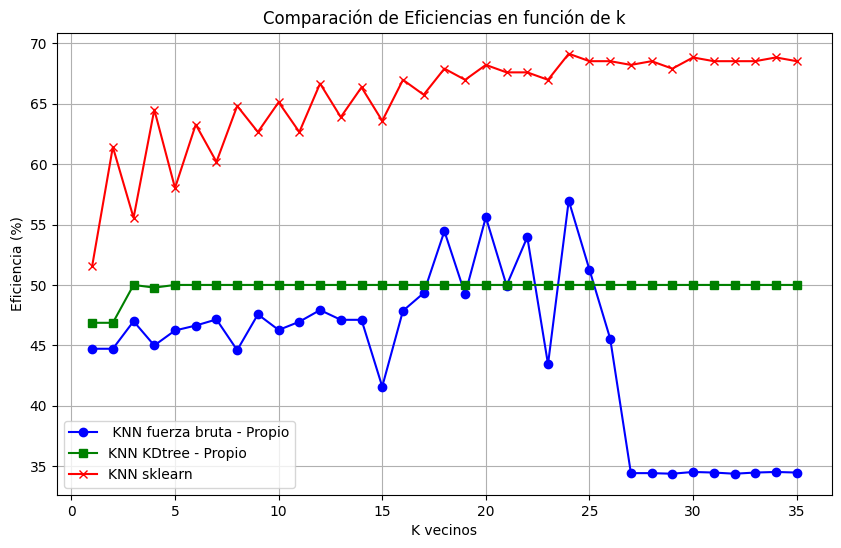

In [37]:
import matplotlib.pyplot as plt

n = 35

k_valores = list(range(1, n+1))  # valores de k desde 1 hasta n

plt.figure(figsize=(10, 6))

# Graficando eficiencias de cada algoritmo
plt.plot(k_valores, eficiencias_KNNBruteForce, '-o', label=" KNN fuerza bruta - Propio", color='blue')
plt.plot(k_valores, eficiencias_KNN_KDtree, '-s', label="KNN KDtree - Propio", color='green')
plt.plot(k_valores, eficiencias_KNN_sklearn, '-x', label="KNN sklearn", color='red')


# Título, etiquetas y leyenda
plt.title("Comparación de Eficiencias en función de k")
plt.xlabel("K vecinos")
plt.ylabel("Eficiencia (%)")
plt.legend()
plt.grid(True)
plt.show()


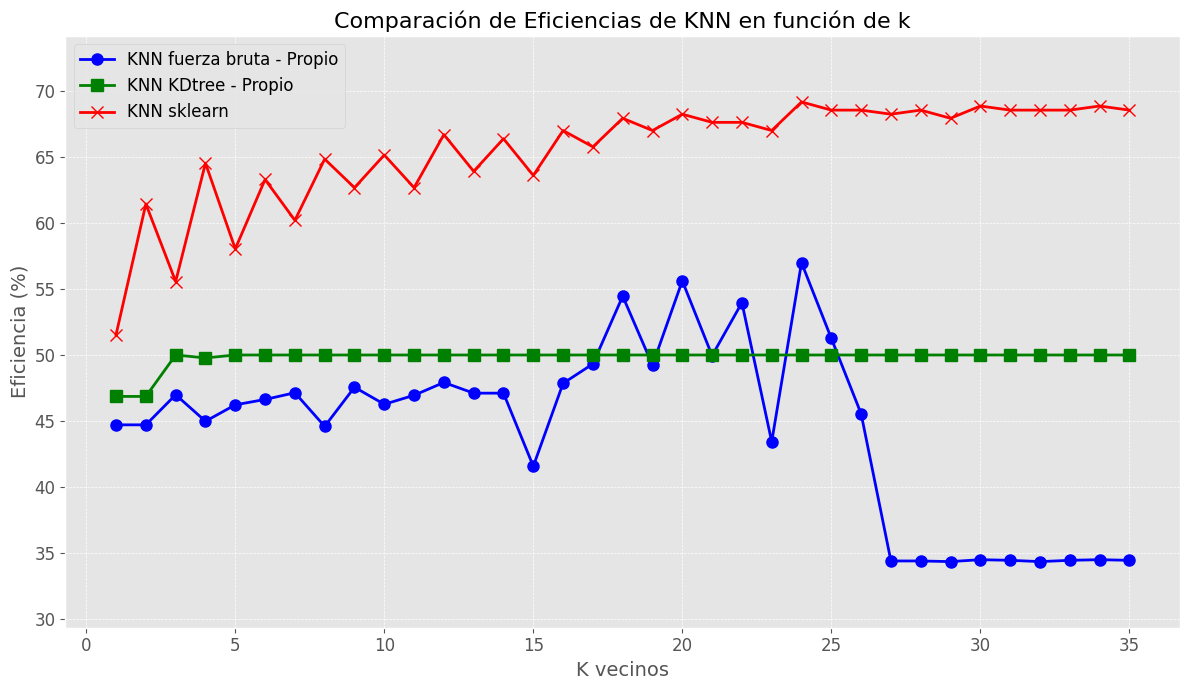

In [49]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n = 35
k_valores = list(range(1, n+1))

plt.figure(figsize=(12, 7))

# Graficando eficiencias con un grosor de línea de 2
plt.plot(k_valores, eficiencias_KNNBruteForce, '-o', label="KNN fuerza bruta - Propio", color='blue', linewidth=2, markersize=8)
plt.plot(k_valores, eficiencias_KNN_KDtree, '-s', label="KNN KDtree - Propio", color='green', linewidth=2, markersize=8)
plt.plot(k_valores, eficiencias_KNN_sklearn, '-x', label="KNN sklearn", color='red', linewidth=2, markersize=8)

# Límites para los ejes y
plt.ylim([min(eficiencias_KNNBruteForce + eficiencias_KNN_sklearn + eficiencias_KNN_KDtree) - 5, 
          max(eficiencias_KNNBruteForce + eficiencias_KNN_sklearn + eficiencias_KNN_KDtree) + 5])

# Título y etiquetas
plt.title("Comparación de Eficiencias de KNN en función de k", fontsize=16)
plt.xlabel("K vecinos", fontsize=14)
plt.ylabel("Eficiencia (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ajustar layout
plt.show()


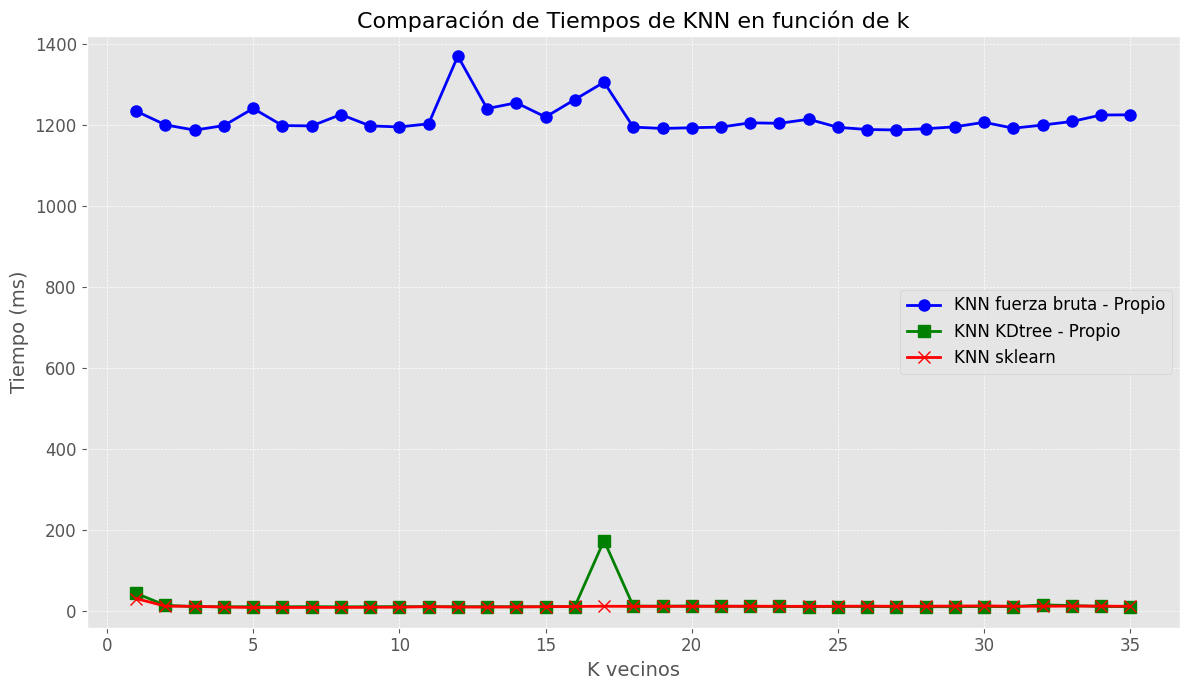

In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n = 35
k_valores = list(range(1, n+1))

plt.figure(figsize=(12, 7))

# Graficando eficiencias con un grosor de línea de 2
plt.plot(k_valores, tiempos_KNNBruteForce, '-o', label="KNN fuerza bruta - Propio", color='blue', linewidth=2, markersize=8)
plt.plot(k_valores, tiempos_KNN_KDtree, '-s', label="KNN KDtree - Propio", color='green', linewidth=2, markersize=8)
plt.plot(k_valores, tiempos_KNN_sklearn, '-x', label="KNN sklearn", color='red', linewidth=2, markersize=8)

# Límites para los ejes y
plt.ylim([min(tiempos_KNNBruteForce + tiempos_KNN_sklearn + tiempos_KNN_KDtree) - 50, 
          max(tiempos_KNNBruteForce + tiempos_KNN_sklearn + tiempos_KNN_KDtree) + 50])

# Título y etiquetas
plt.title("Comparación de Tiempos de KNN en función de k", fontsize=16)
plt.xlabel("K vecinos", fontsize=14)
plt.ylabel("Tiempo (ms)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ajustar layout
plt.show()

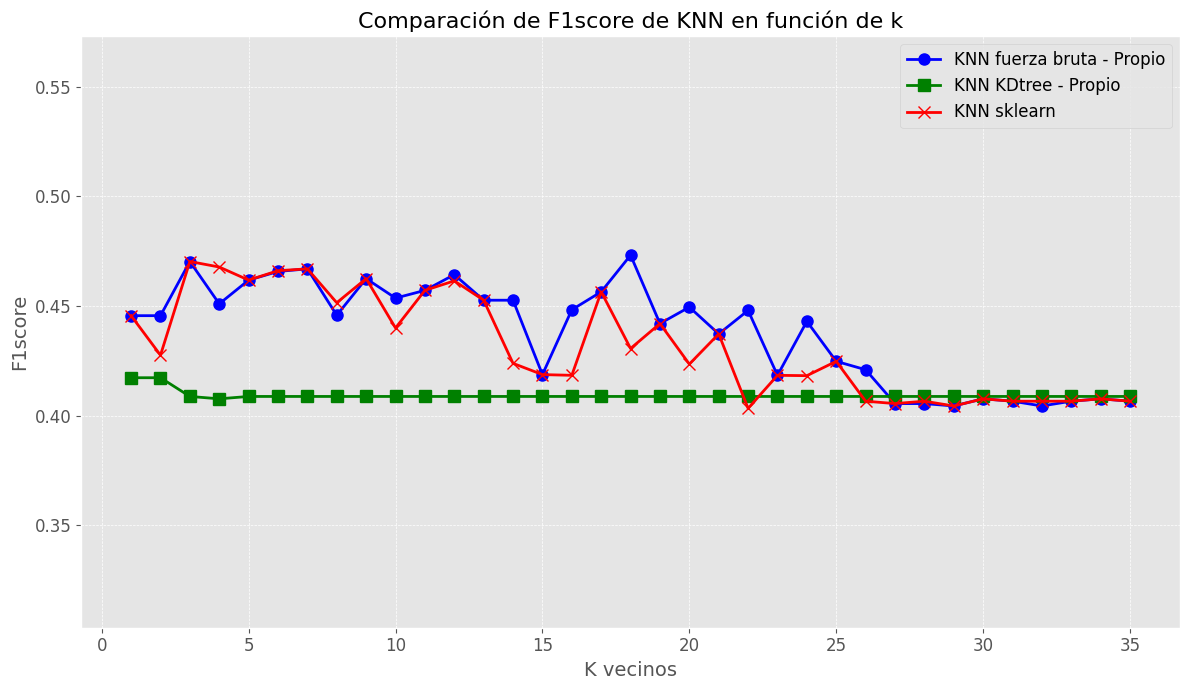

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n = 35
k_valores = list(range(1, n+1))

plt.figure(figsize=(12, 7))

# Graficando eficiencias con un grosor de línea de 2
plt.plot(k_valores, f1score_KNNBruteForce, '-o', label="KNN fuerza bruta - Propio", color='blue', linewidth=2, markersize=8)
plt.plot(k_valores, f1score_KNN_KDtree, '-s', label="KNN KDtree - Propio", color='green', linewidth=2, markersize=8)
plt.plot(k_valores, f1score_KNN_sklearn, '-x', label="KNN sklearn", color='red', linewidth=2, markersize=8)

# Límites para los ejes y
plt.ylim([min(f1score_KNNBruteForce + f1score_KNN_sklearn + f1score_KNN_KDtree) - 0.1, 
          max(f1score_KNNBruteForce + f1score_KNN_sklearn + f1score_KNN_KDtree) + 0.1])

# Título y etiquetas
plt.title("Comparación de F1score de KNN en función de k", fontsize=16)
plt.xlabel("K vecinos", fontsize=14)
plt.ylabel("F1score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ajustar layout
plt.show()

## Gráficas de barras

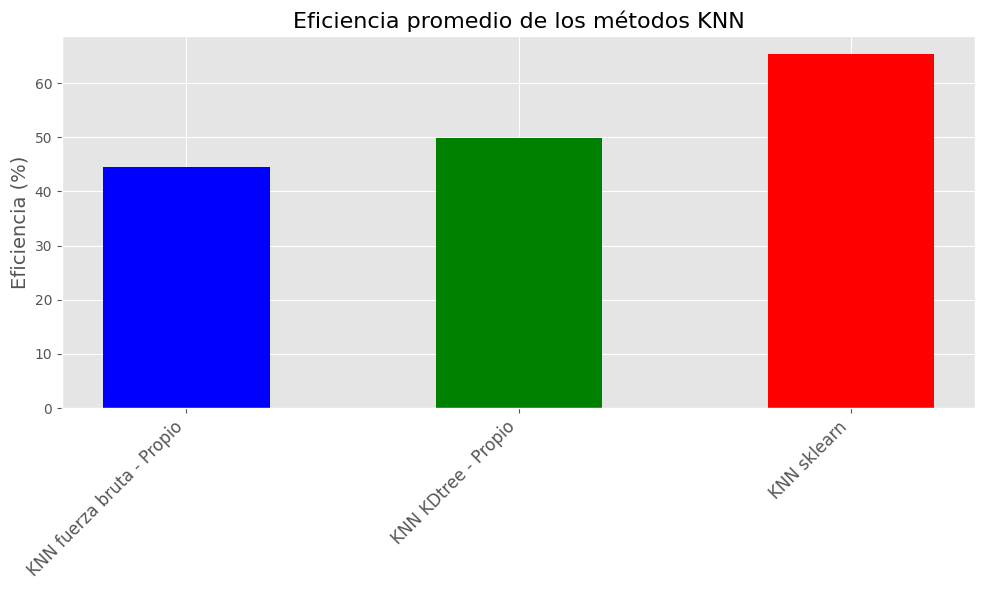

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Reorganizando los datos
eficiencias_promedio = [np.mean(eficiencias_KNNBruteForce), np.mean(eficiencias_KNN_KDtree), np.mean(eficiencias_KNN_sklearn)]
nombres_metodos = ['KNN fuerza bruta - Propio', 'KNN KDtree - Propio', 'KNN sklearn']

plt.figure(figsize=(10, 6))
# Ajustando el ancho de las barras con el parámetro 'width'
plt.bar(nombres_metodos, eficiencias_promedio, color=['blue', 'green', 'red'], width=0.5)
plt.title('Eficiencia promedio de los métodos KNN', fontsize=16)
plt.ylabel('Eficiencia (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()
plt.show()